1. Analyze and Preprocess data - Check if the dataset has missing values or has any other problem.
2. Feature Engineering
3. Divide the dataset into 2 training and test sets
4. Use Pipeline
    4. a. Use scaler and dimensional reduction (if it is necessary).
    4. b. Use suitable Naive Bayes for this problem.
5. Perform model on training set and test set using gridsearch CV
6. Measure performance of the model.
7. Which metric is your main metric for this problem and why? What are your scaler, dimensional reduction and naive bayes model as well as their params? (<= 200 words, also input your opinion or conclusion here)


How can I measure your point:
1. Your function is callable and runs correctly
2. The performance of your model (in full pipeline) is acceptable. The final error based on my train and test set is low enough.
3. The data preprocessing is correct or make sense
4. The Feature engineering is correct or make sense
5. Any other additional process will be considered a small plus point.

A Travel Company Is Offering Travel Insurance Packages To Their Customers. The new insurance plan also covers Covid-19. The Company Claims To Know Which Customers Are Interested To Buy It Based On The Company's Database History.

* Age - Age Of The Customer
* Employment Type - The Sector In Which Customer Is Employed
GraduateOrNot - Whether The Customer Is College Graduate Or Not
* AnnualIncome - The Yearly Income Of The Customer In Indian Rupees
* FamilyMembers - Number Of Members In Customer's Family
* ChronicDisease - Whether The Customer Suffers From Any Major Disease Or Conditions Like Diabetes/High BP or Asthama,etc.
* FrequentFlyer - Derived Data Based On Customer's History Of Booking Air Tickets On Atleast 4 Different Instances In The Last 2 Years (2017-2019).
* EverTravelledAbroad - Has The Customer Ever Travelled To A Foreign Country
* TravelInsurance - Did The Customer Buy Travel Insurance Package During Introductory Offering Held In The Year 2019.

## Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
PATH = "/content/drive/MyDrive/Intro ML/Week 3 /data/TravelInsurancePrediction.csv" # Path to your file

df = pd.read_csv(PATH)
df.head()
#ToDo: Show histogram of dataframe

,Unnamed: 0,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,0,31,Government Sector,Yes,400000,6,1,No,No,0
1,1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


In [3]:
df['Employment Type'].nunique()

2

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'AnnualIncome'}>],
       [<Axes: title={'center': 'FamilyMembers'}>,
        <Axes: title={'center': 'ChronicDiseases'}>],
       [<Axes: title={'center': 'TravelInsurance'}>, <Axes: >]],
      dtype=object)

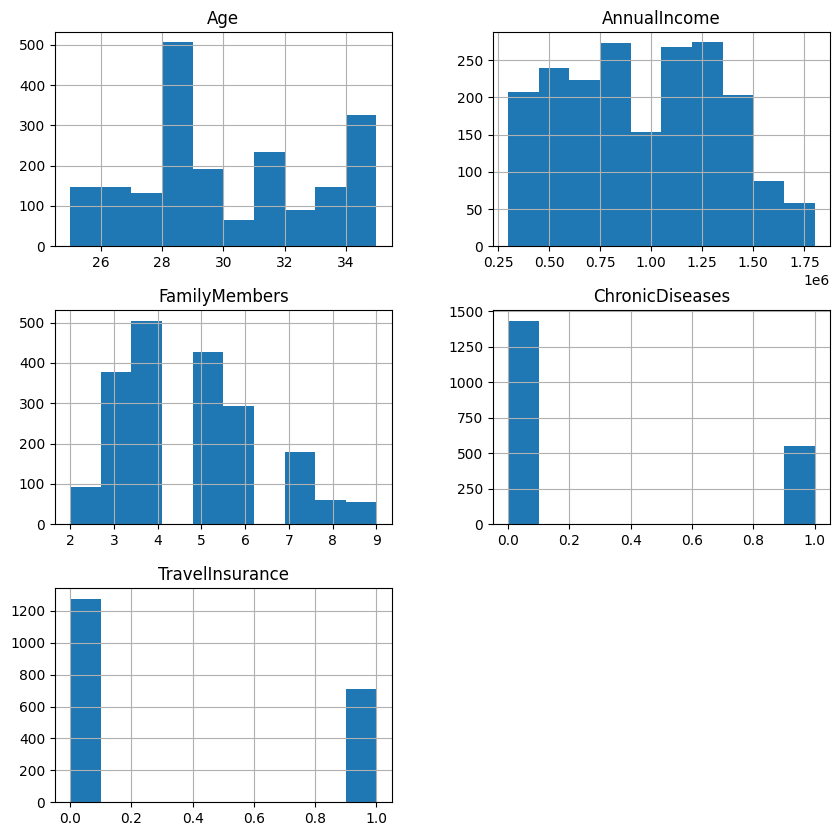

In [5]:
#Show histogram of dataframe
df[['Age','AnnualIncome','FamilyMembers','ChronicDiseases','TravelInsurance']].hist(figsize=(10,10))

## Data Analysis

In [6]:
# Data analysis
# Todo: analyze your data here

In [7]:
#Print columns in dataframe
df.columns.tolist()

['Unnamed: 0',
 'Age',
 'Employment Type',
 'GraduateOrNot',
 'AnnualIncome',
 'FamilyMembers',
 'ChronicDiseases',
 'FrequentFlyer',
 'EverTravelledAbroad',
 'TravelInsurance']

In [8]:
#Check types of features in dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987 entries, 0 to 1986
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           1987 non-null   int64 
 1   Age                  1987 non-null   int64 
 2   Employment Type      1987 non-null   object
 3   GraduateOrNot        1987 non-null   object
 4   AnnualIncome         1987 non-null   int64 
 5   FamilyMembers        1987 non-null   int64 
 6   ChronicDiseases      1987 non-null   int64 
 7   FrequentFlyer        1987 non-null   object
 8   EverTravelledAbroad  1987 non-null   object
 9   TravelInsurance      1987 non-null   int64 
dtypes: int64(6), object(4)
memory usage: 155.4+ KB


In [9]:
#Check null values in dataframe
df.isnull().sum()

Unnamed: 0             0
Age                    0
Employment Type        0
GraduateOrNot          0
AnnualIncome           0
FamilyMembers          0
ChronicDiseases        0
FrequentFlyer          0
EverTravelledAbroad    0
TravelInsurance        0
dtype: int64

In [10]:
#Check duplicate value in data
df.duplicated().sum()

0

In [11]:
#Check the class balance
df['TravelInsurance'].value_counts()

TravelInsurance
0    1277
1     710
Name: count, dtype: int64

<Axes: ylabel='Age'>

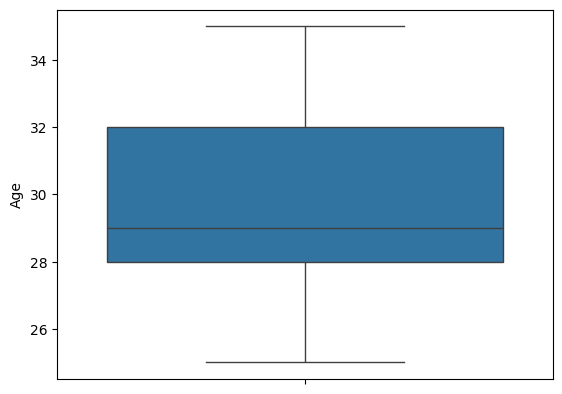

In [12]:
#Check outliner in features
sns.boxplot(df['Age'])

<Axes: ylabel='AnnualIncome'>

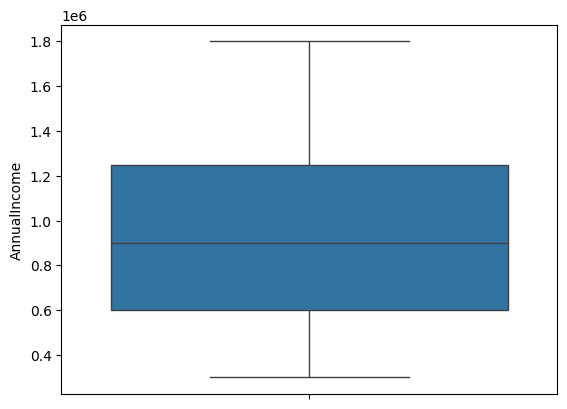

In [13]:
sns.boxplot(df['AnnualIncome'])

<Axes: ylabel='FamilyMembers'>

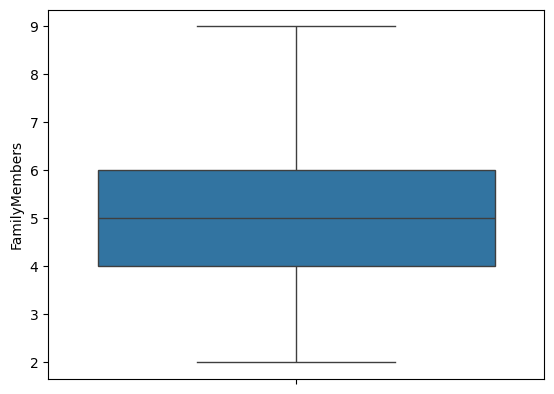

In [14]:
sns.boxplot(df['FamilyMembers'])

**We can conclude that the dataset has no outliner**

## Preprocessing

In [15]:
def preprocessing_data(df):
    """
    Preprocess your data (eg. Drop null datapoints or fill missing data)
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: preprocess data
    #Feature selection
    df.drop("Unnamed: 0", axis=1, inplace=True)
    return df

In [16]:
df = preprocessing_data(df.copy())
df.head()


,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,Government Sector,Yes,400000,6,1,No,No,0
1,31,Private Sector/Self Employed,Yes,1250000,7,0,No,No,0
2,34,Private Sector/Self Employed,Yes,500000,4,1,No,No,1
3,28,Private Sector/Self Employed,Yes,700000,3,1,No,No,0
4,28,Private Sector/Self Employed,Yes,700000,8,1,Yes,No,0


## Feature Engineering

In [17]:
# Print unique values of Employment Type col
print(df['Employment Type'].unique())

# Print unique values of GraduateOrNot Type col
print(df['GraduateOrNot'].unique())

# Print unique values of FrequentFlyer Type col
print(df['FrequentFlyer'].unique())

# Print unique values of EverTravelledAbroad Type col
print(df['EverTravelledAbroad'].unique())

['Government Sector' 'Private Sector/Self Employed']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']


In [28]:
# Heatmap
import seaborn as sns
from sklearn import preprocessing

def apply_feature_engineering(df):
    """
    Apply all feature engineering to transform your data into number
    :param df: pandas DataFrame
    :return: pandas DataFrame
    """
    # Todo: Normalize your data
    #Feature transformation
    label_encoder = preprocessing.LabelEncoder()

    #Using label encoder for categorical features
    df['Employment Type']= label_encoder.fit_transform(df['Employment Type'])
    df['GraduateOrNot']= label_encoder.fit_transform(df['GraduateOrNot'])
    df['FrequentFlyer']= label_encoder.fit_transform(df['FrequentFlyer'])
    df['EverTravelledAbroad']= label_encoder.fit_transform(df['EverTravelledAbroad'])

    #df['GraduateOrNot'] = df['GraduateOrNot'].replace({'Yes': 1, 'No': 0})
    #df['FrequentFlyer'] = df['FrequentFlyer'].replace({'Yes': 1, 'No': 0})
    #df['EverTravelledAbroad'] = df['EverTravelledAbroad'].replace({'Yes': 1, 'No': 0})



    return df

df = apply_feature_engineering(df)
df

,Age,Employment Type,GraduateOrNot,AnnualIncome,FamilyMembers,ChronicDiseases,FrequentFlyer,EverTravelledAbroad,TravelInsurance
0,31,0,1,400000,6,1,0,0,0
1,31,1,1,1250000,7,0,0,0,0
2,34,1,1,500000,4,1,0,0,1
3,28,1,1,700000,3,1,0,0,0
4,28,1,1,700000,8,1,1,0,0
...,...,...,...,...,...,...,...,...,...
1982,33,1,1,1500000,4,0,1,1,1
1983,28,1,1,1750000,5,1,0,1,0
1984,28,1,1,1150000,6,1,0,0,0
1985,34,1,1,1000000,6,0,1,1,1


<Axes: >

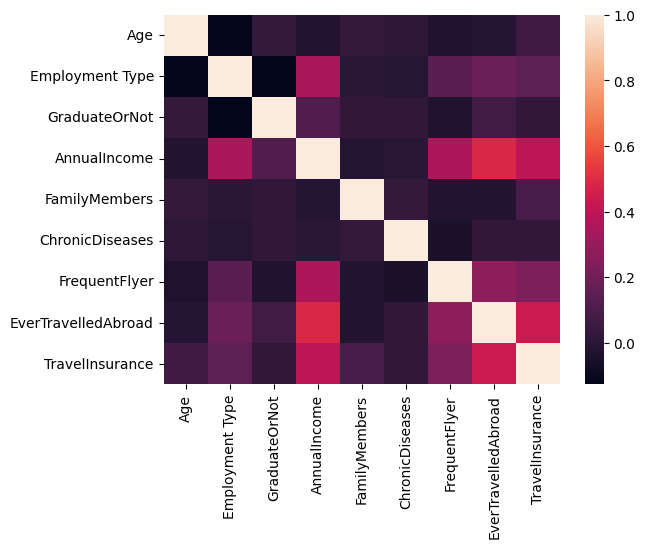

In [29]:
sns.heatmap(df.corr()) # Show heatmap after normalized data

In [30]:
def prepare_X_y(df):
    """
    Feature engineering and create X and y
    :param df: pandas dataframe
    :return: (X, y) output feature matrix (dataframe), target (series)
    """
    # Todo: Split data into X and y (using sklearn train_test_split). Return two dataframes

    #Get columns name to a list
    columns = df.columns.tolist()

    #Feature selection (Remove if necessary)

    #columns.remove('Age')
    #columns.remove('ChronicDiseases')
    #columns.remove('GraduateOrNot')
    #columns.remove('FamilyMembers')
    #columns.remove('FrequentFlyer')
    #columns.remove('EverTravelledAbroad')
    #columns.remove('AnnualIncome')

    columns.remove('TravelInsurance')


    X = df[columns].values
    y = df.TravelInsurance.values
    return X, y

#Apply function
X, y = prepare_X_y(df)

In [31]:
X.shape

(1987, 8)

# Apply machine learning model

## Train-test split

In [32]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 101
TRAIN_SIZE = 0.7

trainX, testX ,trainY, testY = train_test_split(X, y, train_size=TRAIN_SIZE, random_state=RANDOM_STATE)

## Build SK-learn model

In [33]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

def build_model(X, y):
    # Define a Standard Scaler to normalize inputs
    scaler = MinMaxScaler()

    # set the tolerance to a large value to make the example faster
    gau_nb = GaussianNB()
    pipe = Pipeline(steps=[("scaler", scaler), ("gau_nb", gau_nb)]) #Build a pipeline with a scaler and a model

    # Parameters of pipelines can be set using '__' separated parameter names:
    var_smoothing_values = np.logspace(-4, -9, num=100)
    param_grid = {
        "scaler__feature_range": [(-1, 1), (0, 1)],
        'gau_nb__var_smoothing': var_smoothing_values
        }

    search = GridSearchCV(pipe, param_grid, n_jobs=2)
    search.fit(X, y)

    return search



In [34]:
from sklearn import metrics
from sklearn.metrics import classification_report

def calculate_performance(y_true, y_pred):
    """

    :param y_true: ground truth values
    :param y_pred: predictions
    :return:
    """
    # Todo: return your error value like accuracy, f1score, ...
    print("precision", metrics.precision_score(y_true, y_pred))
    print("recall", metrics.recall_score(y_true, y_pred))
    print("accuracy", metrics.accuracy_score(y_true, y_pred))
    print("F1",metrics.f1_score(y_true, y_pred) )
    print(classification_report(testY, y_pred))

    # Todo: Only choose one of them as your score for the question 7
    main_score = metrics.f1_score(y_true, y_pred)
    return main_score





In [35]:
#Build
naive_model = build_model(X, y)

#Apply model to predict
y_pred = naive_model.predict(testX)


In [36]:
calculate_performance(testY,y_pred)

precision 0.6987179487179487
recall 0.5141509433962265
accuracy 0.7487437185929648
F1 0.592391304347826
              precision    recall  f1-score   support

           0       0.77      0.88      0.82       385
           1       0.70      0.51      0.59       212

    accuracy                           0.75       597
   macro avg       0.73      0.70      0.71       597
weighted avg       0.74      0.75      0.74       597



0.592391304347826

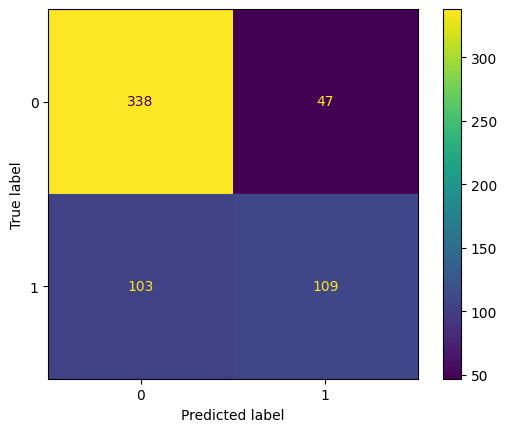

In [37]:
#Create confusion matrix
cm = metrics.confusion_matrix(testY,y_pred)

# Create the display for confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=naive_model.classes_)

# Plot confusion matrix
disp.plot()



           "Other conclusion:"
           - True negatives and false negatives are closer in number, which explains the worse recall score (0.514)
           - The concentration of true positives stands out relative to false positives. This ratio is why the precision score is better than recall (0.698)
            -Accuracy is not trusted because the data of 2 classes is imbalance
            - I tried different feature pairs in feature selection but the results did not improve so I kept all the features for training model
#   So I choose F1 score because it is a balance of recall and precision
           